# Supervised graph classification with Deep Graph CNN

<table><tr><td>Run the latest release of this notebook:</td><td><a href="https://mybinder.org/v2/gh/stellargraph/stellargraph/master?urlpath=lab/tree/demos/graph-classification/dgcnn-graph-classification.ipynb" alt="Open In Binder" target="_parent"><img src="https://mybinder.org/badge_logo.svg"/></a></td><td><a href="https://colab.research.google.com/github/stellargraph/stellargraph/blob/master/demos/graph-classification/dgcnn-graph-classification.ipynb" alt="Open In Colab" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg"/></a></td></tr></table>

In [ ]:
# install StellarGraph if running on Google Colab
import sys
#if 'google.colab' in sys.modules:
#!pip install stellargraph[demos]==0.7.3
!pip install git+https://github.com/VenkateshwaranB/stellargraph.git

from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks')

import pandas as pd


  Cloning https://github.com/VenkateshwaranB/stellargraph.git to /tmp/pip-req-build-dl1z4vqo
  Running command git clone --filter=blob:none --quiet https://github.com/VenkateshwaranB/stellargraph.git /tmp/pip-req-build-dl1z4vqo
  Resolved https://github.com/VenkateshwaranB/stellargraph.git to commit efa1f847109a4ba490e7a5105646a20ee09a3243
  Preparing metadata (setup.py) ... done
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# verify that we're using the correct version of StellarGraph for this notebook
import stellargraph as sg

try:
    sg.utils.validate_notebook_version("1.1.0")
except AttributeError:
    raise ValueError(
        f"This notebook requires StellarGraph version 1.1.0, but a different version {sg.__version__} is installed.  Please see <https://github.com/stellargraph/stellargraph/issues/1172>."
    ) from None

<div class="alert alert-block alert-danger">This notebook is designed for an older StellarGraph version 1.1.0 and may not function correctly with the newer installed version 1.3.0b. Please see: <a href="https://github.com/stellargraph/stellargraph/issues/1172">https://github.com/stellargraph/stellargraph/issues/1172</a>.</div>

<ipython-input-27-345c07da7c9c>:5: DeprecationWarning: This notebook is designed for an older StellarGraph version 1.1.0 and may not function correctly with the newer installed version 1.3.0b. Please see: <https://github.com/stellargraph/stellargraph/issues/1172>.
  sg.utils.validate_notebook_version("1.1.0")


In [ ]:
import pandas as pd
import numpy as np

import stellargraph as sg
from stellargraph.mapper import PaddedGraphGenerator
from stellargraph.layer import DeepGraphCNN
from stellargraph import StellarGraph

from stellargraph import datasets

from sklearn import model_selection
from IPython.display import display, HTML

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow.keras.losses import binary_crossentropy
import tensorflow as tf
import json
import math
import os
import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import DenseNet201
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
from pathlib import Path # help manage f
import gc
from functools import partial
from sklearn import metrics
import itertools
import seaborn as sns
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelBinarizer

LUSC

In [ ]:
path1 = '/content/drive/My Drive/Datasets/R_TCGA/Fused/Single/Clin_LUAD_True_PT_newv4.csv'


  #node_data = pd.read_csv('/content/drive/My Drive/Datasets/Graph/,index_col = 'Unnamed: 0')
node_data2 = pd.read_csv(path1,index_col = 'index')
node_data2['subject'] = -1
print(node_data2.head())

#node_data = node_data.drop(['path'],axis=1)

path2 = '/content/drive/My Drive/Datasets/R_TCGA/Fused/Single/Clin_LUSC_True_PT_newv4.csv'


  #node_data = pd.read_csv('/content/drive/My Drive/Datasets/Graph/,index_col = 'Unnamed: 0')
node_data1 = pd.read_csv(path2,index_col = 'index')
node_data1['subject'] = 1
print(node_data1.head())

#node_data = node_data.drop(['path'],axis=



print(node_data1.shape)
data = []
data =  pd.concat([node_data2, node_data1])
print(data.shape)

#node_subject = data['subject']
data['new_id'] = data.index
#data = data.drop(['subject'],axis=1)
print(data.head())



'''
  if i==0:
    graph_p = StellarGraph( node_data, edges=edge_connections, source_column="0", target_column="1" )
    print(graph_p.info())
  else:
    graph_p[i] = StellarGraph( node_data, edges=edge_connections, source_column="0", target_column="1" )
    print(graph_p[i].info())
'''

#graph = StellarGraph( data )
#print(graph.info())

              ajcc_pathologic_stage_Stage IA  ajcc_staging_system_edition_6th  \
index                                                                           
TCGA.97.A4M7                               1                                0   
TCGA.55.8507                               1                                0   
TCGA.86.A4P8                               0                                0   
TCGA.78.7153                               0                                1   
TCGA.44.6775                               0                                0   

              ajcc_staging_system_edition_7th  ajcc_pathologic_t_T2  \
index                                                                 
TCGA.97.A4M7                                1                     0   
TCGA.55.8507                                1                     0   
TCGA.86.A4P8                                1                     0   
TCGA.78.7153                                0                     1   
TCGA.4

'\n  if i==0:\n    graph_p = StellarGraph( node_data, edges=edge_connections, source_column="0", target_column="1" )\n    print(graph_p.info())\n  else:\n    graph_p[i] = StellarGraph( node_data, edges=edge_connections, source_column="0", target_column="1" )\n    print(graph_p[i].info())\n'

In [ ]:

class_values = sorted(data['subject'].unique())
class_idx = {name: id for id, name in enumerate(class_values)}

paper_idx = {name: idx for idx, name in enumerate(sorted(data['new_id'].unique()))}


data["paper_id"] = data["new_id"].apply(lambda name: paper_idx[name])
#citations["source"] = citations["source"].apply(lambda name: paper_idx[name])
#citations["target"] = citations["target"].apply(lambda name: paper_idx[name])
data["subject2"] = data["subject"].apply(lambda value: class_idx[value])

data_new = data.drop(['paper_id'],axis=1)
#data_new = data.set_index('new_id')
data_new = data_new.drop(['new_id'],axis=1)
print(data_new.head())
data_new2 = []
#data_new2 = data_new.drop(['subject'], axis=1)
#data_new2 = data_new.drop(['subject2'], axis=1)
print(data_new.shape)


              ajcc_pathologic_stage_Stage IA  ajcc_staging_system_edition_6th  \
index                                                                           
TCGA.97.A4M7                               1                                0   
TCGA.55.8507                               1                                0   
TCGA.86.A4P8                               0                                0   
TCGA.78.7153                               0                                1   
TCGA.44.6775                               0                                0   

              ajcc_staging_system_edition_7th  ajcc_pathologic_t_T2  \
index                                                                 
TCGA.97.A4M7                                1                     0   
TCGA.55.8507                                1                     0   
TCGA.86.A4P8                                1                     0   
TCGA.78.7153                                0                     1   
TCGA.4

In [ ]:
train_data, test_data = [], []

for _, group_data in data.groupby("subject"):
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.35
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

#lb = LabelBinarizer()
#label_list = lb.fit_transform(Y_data)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (259, 24)
Test data shape: (412, 24)


In [ ]:
feature_names = set(data.columns) - {"paper_id", "subject","new_id"}
#feature_names = set(data_new.columns) - {"subject"}
num_features = len(feature_names)
num_classes = len(class_idx)
featname_list = list(feature_names)

# Create train and test features as a numpy array.
#x_train = train_data[feature_names].to_numpy()
x_train = train_data[featname_list].to_numpy()
x_test = test_data[featname_list].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["subject2"].to_numpy()
y_test = test_data["subject2"].to_numpy()
print(num_features)

x_train1 = np.asarray(x_train).astype(np.float32)
y_train1 = np.asarray(y_train).astype(np.float32)


21


Federated Members (Clients) as Data Shards

In [ ]:
import random
def create_clients(image_list, label_list, num_clients=2, initial='clients'):
    ''' return: a dictionary with keys clients' names and value as
                data shards - tuple of images and label lists.
        args:
            image_list: a list of numpy arrays of training images
            label_list:a list of binarized labels for each image
            num_client: number of fedrated members (clients)
            initials: the clients'name prefix, e.g, clients_1

    '''

    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]
    print(client_names)
    #randomize the data
    data = list(zip(image_list, label_list))
    random.shuffle(data)

    #shard data and place at each client
    size = len(data)//num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

    #number of clients must equal number of shards
    assert(len(shards) == len(client_names))

    return {client_names[i] : shards[i] for i in range(len(client_names))}

#create clients
clients = create_clients(x_train, y_train, num_clients=2, initial='client')

['client_1', 'client_2']


Processing and Batching Clients' and Test Data

In [4]:

def batch_data(data_shard, bs=32):

    '''Takes in a clients data shard and create a tfds object off it
    args:
        shard: a data, label constituting a client's data shard
        bs:batch size
    return:
        tfds object'''

    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)


#process and batch the training data for each client
clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data)


#process and batch the test set
test_batched = tf.data.Dataset.from_tensor_slices((test_gen, test_graphs.value)).batch(len(test_graphs.value))

NameError: name 'tf' is not defined

In [ ]:
hidden_units = [8, 8]
learning_rate = 0.001 # 0.01
dropout_rate = 0.5 #0.5
num_epochs = 100
batch_size = 256
comms_round = 100

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
'''
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        #loss=keras.losses.BinaryCrossentropy(from_logits=True),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    #early_stopping = keras.callbacks.EarlyStopping(
        #monitor="val_acc", patience=50, restore_best_weights=True
    #)
    # Fit the model.

    #history = model.fit(
        #x=x_train,


    #)

    return history
'''
'''
model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        #loss=keras.losses.BinaryCrossentropy(from_logits=True),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )

history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
        )
'''

optimizer=keras.optimizers.legacy.Adam(learning_rate)
        #loss=keras.losses.BinaryCrossentropy(from_logits=True),
loss=keras.losses.BinaryCrossentropy()
metrics =[keras.metrics.SparseCategoricalAccuracy(name="acc")]
#metrics = ['accuracy']
#optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
#optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)

In [ ]:
'''
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()
'''

In [ ]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

In [ ]:
def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    #inputs = layers.Input(shape=(num_features,), name="input_features")
    inputs = layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):
        # Create an FFN block.
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        # Add skip connection.
        x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
    # Compute logits.
    #logits = layers.Dense(num_classes, name="logits")(x)
    logits = layers.Dense(num_classes)(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="baseline")


baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

Model: "baseline"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_features (InputLayer  [(None, 21)]                 0         []                            
 )                                                                                                
                                                                                                  
 ffn_block1 (Sequential)     (None, 8)                    364       ['input_features[0][0]']      
                                                                                                  
 ffn_block2 (Sequential)     (None, 8)                    208       ['ffn_block1[0][0]']          
                                                                                                  
 skip_connection2 (Add)      (None, 8)                    0         ['ffn_block1[0][0]',   

Model Aggregation (Federated Averaging)

In [ ]:
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)

    return avg_grad

In [ ]:
def test_model(X_test, y_test,  model, comm_round):
    #cce = tf.keras.losses.SparseCategoricalCrossentropy()
    cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    logits = model.predict(X_test, batch_size=100)
    #logits = (model.predict(X_test) > 0.5).astype("float")
    #logits = model.predict(X_test)
    loss = cce(y_test, logits)
    #print(logits)
    #loss = cce(y_test)
    #acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(y_test, axis = 1))
    acc = accuracy_score(tf.argmax(logits, axis=1), y_test)
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, acc, loss))
    return acc, loss

In [ ]:
#initialize global model
#smlp_global = SimpleMLP()
#global_model = smlp_global.build(961, 2)
global_model = create_baseline_model(hidden_units, num_classes, dropout_rate)

#global_acc_list = []
#global_loss_list = []

#commence global training loop
for comm_round in range(comms_round):

    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()

    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    random.shuffle(client_names)

    #loop through each client and create new local model
    for client in client_names:
        #smlp_local = SimpleMLP()
        local_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
        local_model.compile(loss=loss,
                      optimizer=optimizer,
                      metrics=metrics)

        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)

        #fit local model with client's data
        local_model.fit(clients_batched[client], epochs=1, verbose=0)

        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)

        #clear session to free memory after each communication round
        K.clear_session()

    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)

    #update global model
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    for(X_test, y_test) in test_batched:
        global_acc, global_loss = test_model(X_test, y_test, global_model, comm_round)


5/5 [==============================] - 0s 2ms/step
comm_round: 0 | global_acc: 61.165% | global_loss: 0.6768251657485962
5/5 [==============================] - 0s 3ms/step
comm_round: 1 | global_acc: 61.650% | global_loss: 0.6818414926528931
5/5 [==============================] - 0s 2ms/step
comm_round: 2 | global_acc: 61.650% | global_loss: 0.6845336556434631
5/5 [==============================] - 0s 2ms/step
comm_round: 3 | global_acc: 61.165% | global_loss: 0.6898003220558167
5/5 [==============================] - 0s 2ms/step
comm_round: 4 | global_acc: 61.650% | global_loss: 0.6892140507698059
5/5 [==============================] - 0s 3ms/step
comm_round: 5 | global_acc: 60.437% | global_loss: 0.6961605548858643
5/5 [==============================] - 0s 3ms/step
comm_round: 6 | global_acc: 60.922% | global_loss: 0.7018459439277649
5/5 [==============================] - 0s 2ms/step
comm_round: 7 | global_acc: 61.165% | global_loss: 0.7031042575836182
5/5 [===========================

In [ ]:

#train_data = pd.DataFrame(x_train)
#train_lab = pd.DataFrame(y_train)
#x_train = train_data.values
#y_train1 = y_train

#x_train1 = np.asarray(x_train).astype(np.float32)
#y_train1 = np.asarray(y_train).astype(np.float32)

#x_train1 = np.asarray(x_train)
#y_train1= np.asarray(y_train).astype('float32')
#y_train1 =  tf.data.Dataset.from_tensor_slices(int(y_train))
#y_train1 = tf.convert_to_tensor(int(y_train))

#test_data = pd.DataFrame(x_test
#test_data = tf.data.Dataset.from_tensor_slices((x_test))

#train_data = pd.DataFrame(x_train)
#train_lab = pd.DataFrame(y_train)
history = run_experiment(baseline_model, x_train1,y_train1 )

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 6.5358 - acc: 0.5549 - val_loss: 4.8425 - val_acc: 0.4194
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 6.1297 - acc: 0.4855 - val_loss: 4.6331 - val_acc: 0.4516
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 6.4513 - acc: 0.5260 - val_loss: 4.4134 - val_acc: 0.4194
Epoch 4/100
1/1 [==============================] - 0s 30ms/step - loss: 6.0651 - acc: 0.4971 - val_loss: 4.3819 - val_acc: 0.4194
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 5.7124 - acc: 0.5318 - val_loss: 4.3544 - val_acc: 0.4194
Epoch 6/100
1/1 [==============================] - 0s 27ms/step - loss: 6.8796 - acc: 0.5318 - val_loss: 4.3364 - val_acc: 0.4194
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 6.1529 - acc: 0.4855 - val_loss: 4.1939 - val_acc: 0.4194
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 6.4258 - acc: 0.5549

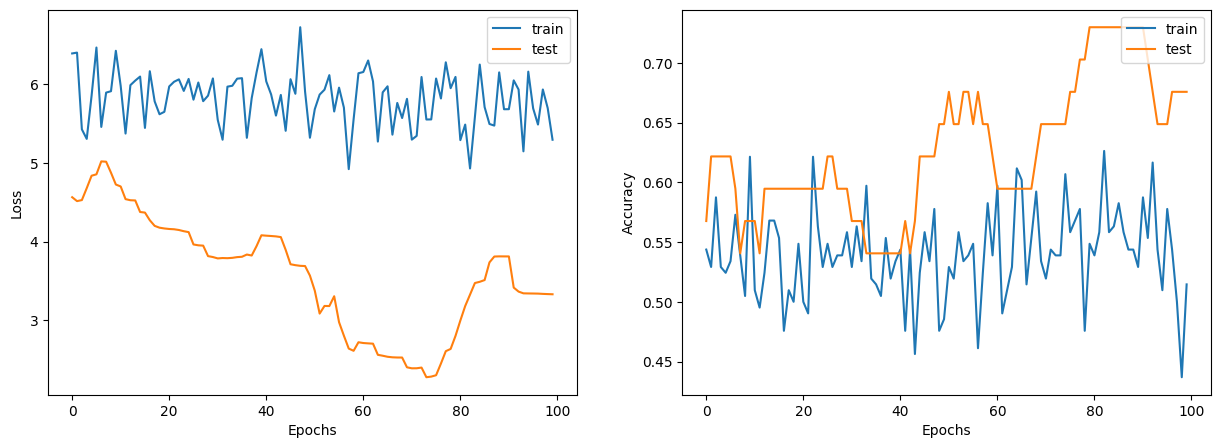

In [ ]:
display_learning_curves(history)